<a href="https://colab.research.google.com/github/ProshkinNV/Text/blob/main/GitHub_Poets_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Загрузка**

In [ ]:
print("     Загрузка датасэта:\n")
!wget https://storage.yandexcloud.net/academy.ai/russian_literature.zip #загрузка датасэта


print("\n     Загрузка эмбединга:\n")
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar


print("\n     Установка navec:\n")
!pip install navec


     Загрузка датасэта:

--2024-04-23 00:50:21--  https://storage.yandexcloud.net/academy.ai/russian_literature.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21547079 (21M) [application/x-zip-compressed]
Saving to: ‘russian_literature.zip’

russian_literature. 100%[===================>]  20.55M  6.20MB/s    in 3.9s    

2024-04-23 00:50:27 (5.31 MB/s) - ‘russian_literature.zip’ saved [21547079/21547079]


     Загрузка эмбединга:

--2024-04-23 00:50:27--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

**Подключение библиотек**

In [ ]:
from keras.models import Sequential
from keras.utils import get_file, to_categorical
from keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization, Dropout, SimpleRNN
from keras.layers import GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

from keras.preprocessing.text import Tokenizer

import os   # Модуль для работы с файловой системой

import glob # Вспомогательный модуль для работы с файловой системой
import numpy as np

from navec import Navec

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

**Извлечение датасэта**

In [ ]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "russian_literature" -d ./dataset

**Формирование меток**

In [ ]:
!dir ./dataset/prose
!dir ./dataset/poems
!dir ./dataset/publicism

Blok  Bryusov  Chekhov	Dostoevsky  Gogol  Gorky  Herzen  Lermontov  Pushkin  Tolstoy  Turgenev
Blok  Lermontov  Nekrasov  Pushkin
Tolstoy


In [ ]:
CLASS_LIST_TEMP = []

temp_poems = os.listdir('./dataset/poems')
temp_prose = os.listdir('./dataset/prose')
temp_publicism = os.listdir('./dataset/publicism')

CLASS_LIST_TEMP.extend(temp_poems)
CLASS_LIST_TEMP.extend(temp_prose)
CLASS_LIST_TEMP.extend(temp_publicism)

#uniq
CLASS_LIST_TEMP = set(CLASS_LIST_TEMP)

#set to array
CLASS_LIST_TEMP = np.array(list(CLASS_LIST_TEMP))

print(CLASS_LIST_TEMP)

['Herzen' 'Dostoevsky' 'Tolstoy' 'Nekrasov' 'Gorky' 'Pushkin' 'Blok'
 'Gogol' 'Chekhov' 'Turgenev' 'Lermontov' 'Bryusov']


**Формирование датасэта**

In [ ]:
all_texts = {} # Собираем в словарь весь датасет
dict_mean = dict()
for author in CLASS_LIST_TEMP:
  all_texts[author] = '' # Инициализируем пустой строкой новый ключ словаря
  for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) +  glob.glob('./dataset/poems/{}/*.txt'.format(author)): # Поиск файлов по шаблону
    with open(f'{path}', 'r', errors='ignore') as f: # игнорируем ошибки (например символы из другой кодировки)
                # Загрузка содержимого файла в строку
                text = f.read()

    all_texts[author]  += ' ' + text.replace('\n', ' ') # Заменяем символ перехода на новую строку пробелом

# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in all_texts.values())
print(f'Датасет состоит из {total} символов')

print('Общая выборка по писателям:')
for author in CLASS_LIST_TEMP:
    # удобный метод форматирования 2 знака после запятой f'{ВЫРАЖЕНИЕ:.2f}'
    print(f'{author} - {len(all_texts[author])} символов, доля в общей базе: {len(all_texts[author])/total*100 :.2f}%')
    dict_mean[author] = len(all_texts[author])/total*100

Датасет состоит из 38146925 символов
Общая выборка по писателям:
Herzen - 1282316 символов, доля в общей базе: 3.36%
Dostoevsky - 11221679 символов, доля в общей базе: 29.42%
Tolstoy - 9392435 символов, доля в общей базе: 24.62%
Nekrasov - 351258 символов, доля в общей базе: 0.92%
Gorky - 4324025 символов, доля в общей базе: 11.34%
Pushkin - 1399557 символов, доля в общей базе: 3.67%
Blok - 604204 символов, доля в общей базе: 1.58%
Gogol - 2196599 символов, доля в общей базе: 5.76%
Chekhov - 1834330 символов, доля в общей базе: 4.81%
Turgenev - 2345243 символов, доля в общей базе: 6.15%
Lermontov - 364382 символов, доля в общей базе: 0.96%
Bryusov - 2830897 символов, доля в общей базе: 7.42%


In [ ]:
for item in dict_mean:
  print(f'Автор: {item} значение: {dict_mean[item]:.2f}%')

sorted_dict = dict(sorted(dict_mean.items(),key = lambda item:item[1],reverse=True))

print("\nsorted_dict:\n")
for item in sorted_dict:

  print(f'Автор: {item} значение: {sorted_dict[item]:.2f}%')

#создание списка ключей
list_key_sorted_dict = list(sorted_dict.keys())

Автор: Herzen значение: 3.36%
Автор: Dostoevsky значение: 29.42%
Автор: Tolstoy значение: 24.62%
Автор: Nekrasov значение: 0.92%
Автор: Gorky значение: 11.34%
Автор: Pushkin значение: 3.67%
Автор: Blok значение: 1.58%
Автор: Gogol значение: 5.76%
Автор: Chekhov значение: 4.81%
Автор: Turgenev значение: 6.15%
Автор: Lermontov значение: 0.96%
Автор: Bryusov значение: 7.42%

sorted_dict:

Автор: Dostoevsky значение: 29.42%
Автор: Tolstoy значение: 24.62%
Автор: Gorky значение: 11.34%
Автор: Bryusov значение: 7.42%
Автор: Turgenev значение: 6.15%
Автор: Gogol значение: 5.76%
Автор: Chekhov значение: 4.81%
Автор: Pushkin значение: 3.67%
Автор: Herzen значение: 3.36%
Автор: Blok значение: 1.58%
Автор: Lermontov значение: 0.96%
Автор: Nekrasov значение: 0.92%


Т.к. в задаче сказано, что минимальное количество классов должно быть не менее 4-х, то возьмем 4 писателя, что положительно повлияет на точность сети.

In [ ]:
CLASS_LIST=[]
i = 0

while(i<4):
  CLASS_LIST.append(list_key_sorted_dict[i])
  i +=1

print(CLASS_LIST)

['Dostoevsky', 'Tolstoy', 'Gorky', 'Bryusov']


*Формирование выборки*

In [ ]:
all_texts = {} # Собираем в словарь весь датасет

for author in CLASS_LIST:
  all_texts[author] = '' # Инициализируем пустой строкой новый ключ словаря
  for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) +  glob.glob('./dataset/poems/{}/*.txt'.format(author)): # Поиск файлов по шаблону
    with open(f'{path}', 'r', errors='ignore') as f: # игнорируем ошибки (например символы из другой кодировки)
                # Загрузка содержимого файла в строку
                text = f.read()

    all_texts[author]  += ' ' + text.replace('\n', ' ') # Заменяем символ перехода на новую строку пробелом

**Токенизация**

In [ ]:
embedding_dim = 300    # размерность векторов эмбединга (300d в имени эмбединга)
max_words = 15000      # Количество слов, рассматриваемых как признаки

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', char_level=False)


# Построение частотного словаря по текстам
tokenizer.fit_on_texts(all_texts.values())

**Преобразование текста в последовательность**

In [ ]:
seq_train = tokenizer.texts_to_sequences(all_texts.values())

**Балансировка датасэта**

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in seq_train)
print(f'Датасет состоит из {total} слов')

Датасет состоит из 3701852 слов


In [ ]:
print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    print(f'{author} - {len(seq_train[cls])} слов, доля в общей базе: {len(seq_train[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))

Общая выборка по писателям (по словам):
Dostoevsky - 1553773 слов, доля в общей базе: 41.97%
Tolstoy - 1243118 слов, доля в общей базе: 33.58%
Gorky - 554749 слов, доля в общей базе: 14.99%
Bryusov - 350212 слов, доля в общей базе: 9.46%
Среднее значение слов:  925463.0
Медианное значение слов:  898933.5


*Т.к. наименьшее количество слов 350228, возьмем данное число для балансировки округлив его до 350000*

In [ ]:
seq_train_balance = [seq_train[cls][:350000] for cls in range(len(CLASS_LIST))]

Визуальная проверка балансировки

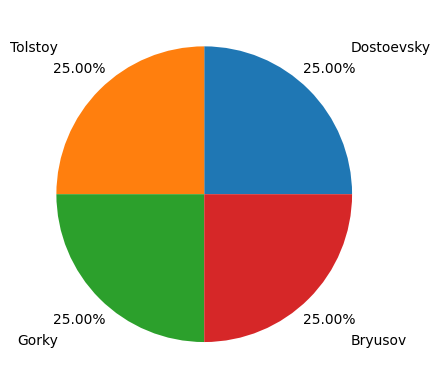

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance], # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

In [ ]:
CLASS_LIST

['Dostoevsky', 'Tolstoy', 'Gorky', 'Bryusov']

**Метод скользящего окна**

*Для разбиения на обучающую, валидационную и контрольную выборки*

In [ ]:
WIN_SIZE = 1000   # Ширина окна в токенах
WIN_STEP = 100    # Шаг окна в токенах

# Функция разбиения последовательности на отрезки скользящим окном
# Последовательность разбивается на части до последнего полного окна
# Параметры:
# sequence - последовательность токенов
# win_size - размер окна
# step - шаг окна
def seq_split(sequence, WIN_SIZE, step):
    # Делим строку на отрезки с помощью генератора цикла
    return [sequence[i:i + WIN_SIZE] for i in range(0, len(sequence) - WIN_SIZE + 1, step)]

def seq_vectorize(
    seq_list,   # Последовательность
    test_split, # Доля на тестовую выборку
    control_split, #Доля на контрольную выборку
    class_list, # Список классов
    win_size,   # Ширина скользящего окна
    step        # Шаг скользящего окна
):

    # Списки для результирующих данных
    x_train, y_train, x_test, y_test, x_control, y_control =  [], [], [], [], [], []

    # Пробежимся по всем классам:
    for class_item in CLASS_LIST:
        # Получим индекс класса
        cls = CLASS_LIST.index(class_item)

        # Пороговое значение индекса для разбивки на тестовую, обучающую и контрольную выборки
        gate_split = int(len(seq_list[cls]) * (1-test_split - control_split))
        gate_split_contl = int(len(seq_list[cls]) * (1 -control_split))

        # Разбиваем последовательность токенов класса на отрезки
        vectors_train = seq_split(seq_list[cls][:gate_split], WIN_SIZE, step) # последовательность до порога попадет в обучающую выборку
        vectors_test = seq_split(seq_list[cls][gate_split:gate_split_contl], WIN_SIZE, step)  # последовательность после порога попадет в тестовую выборку
        vectors_control = seq_split(seq_list[cls][gate_split_contl:], WIN_SIZE, step)  # последовательность после порога тестовой выборки попадет в контрольную выборку

        # Добавляем отрезки в выборку
        x_train += vectors_train
        x_test += vectors_test
        x_control += vectors_control

        # Для всех отрезков класса добавляем метки класса в виде one-hot-encoding
        # Каждую метку берем len(vectors) раз, так она одинакова для всех выборок одного класса
        y_train += [to_categorical(cls, len(CLASS_LIST))] * len(vectors_train)
        y_test += [to_categorical(cls, len(CLASS_LIST))] * len(vectors_test)
        y_control += [to_categorical(cls, len(CLASS_LIST))] * len(vectors_control)

    # Возвращаем результатов как numpy-массивов
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test), np.array(x_control), np.array(y_control)

In [ ]:
x_train, y_train, x_test, y_test, x_control, y_control = seq_vectorize(seq_train_balance, 0.1, 0.1, CLASS_LIST, WIN_SIZE, WIN_STEP)

**Проверка входной формы для выборок**

In [ ]:
print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')
print()
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')
print()
print(f'Форма входных данных для контрольной выборки: {x_control.shape}')
print(f'Форма выходных данных (меток) для контрольной выборки: {y_control.shape}')

Форма входных данных для обучающей выборки: (11164, 1000)
Форма выходных данных (меток) для обучающей выборки: (11164, 4)

Форма входных данных для тестовой выборки: (1364, 1000)
Форма выходных данных (меток) для тестовой выборки: (1364, 4)

Форма входных данных для контрольной выборки: (1364, 1000)
Форма выходных данных (меток) для контрольной выборки: (1364, 4)


**Вспомогательные функции**

In [ ]:
# Вывод графиков точности и ошибки
def show_plot(history, title=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели: '+title)
    ax1.plot(history.history['accuracy'],
               label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'],
               label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода предсказанных значений
def show_confusion_matrix(y_true, y_pred, class_labels):
    # Матрица ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, 3)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
    plt.show()


    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

**Функция загрузки весов Наташи для Embedding**

In [ ]:
def loadEmbedding(model):
    word_index = tokenizer.word_index
    embeddings_index = navec

    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = False
    return model

**Построение архитектуры модели**

In [ ]:
model_MIX = Sequential()
model_MIX.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE))
model_MIX.add(SpatialDropout1D(0.3))
model_MIX.add(BatchNormalization())

# Два двунаправленных рекуррентных слоя LSTM
model_MIX.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Два рекуррентных слоя GRU
model_MIX.add(GRU(16, return_sequences=True, reset_after=True))
model_MIX.add(GRU(16, reset_after=True))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Дополнительный полносвязный слой
model_MIX.add(Dense(100, activation='relu'))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())
model_MIX.add(Dense(len(CLASS_LIST), activation='softmax'))

In [ ]:
#загрузка эмбдинга
model_MIX = loadEmbedding(model_MIX)

In [ ]:
model_MIX.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_MIX.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         4500000   
                                                                 
 spatial_dropout1d (Spatial  (None, 1000, 300)         0         
 Dropout1D)                                                      
                                                                 
 batch_normalization (Batch  (None, 1000, 300)         1200      
 Normalization)                                                  
                                                                 
 bidirectional (Bidirection  (None, 1000, 16)          19776     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1000, 16)          1600      
 onal)                                                  

In [ ]:
history_mix = model_MIX.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/15
88/88 [==============================] - 41s 215ms/step - loss: 1.6536 - accuracy: 0.2678 - val_loss: 1.3785 - val_accuracy: 0.2808
Epoch 2/15
88/88 [==============================] - 17s 199ms/step - loss: 1.4939 - accuracy: 0.2955 - val_loss: 1.3298 - val_accuracy: 0.4135
Epoch 3/15
88/88 [==============================] - 17s 188ms/step - loss: 1.3813 - accuracy: 0.3490 - val_loss: 1.2101 - val_accuracy: 0.4817
Epoch 4/15
88/88 [==============================] - 17s 192ms/step - loss: 1.2707 - accuracy: 0.4304 - val_loss: 1.0330 - val_accuracy: 0.5638
Epoch 5/15
88/88 [==============================] - 18s 204ms/step - loss: 1.1316 - accuracy: 0.5138 - val_loss: 0.7718 - val_accuracy: 0.6554
Epoch 6/15
88/88 [==============================] - 17s 194ms/step - loss: 0.9901 - accuracy: 0.5933 - val_loss: 0.6682 - val_accuracy: 0.6906
Epoch 7/15
88/88 [==============================] - 17s 197ms/step - loss: 0.8976 - accuracy: 0.6410 - val_loss: 0.6448 - val_accuracy: 0.7207

**Матрица ошибок на валидационной выборке**

43/43 [==============================] - 5s 74ms/step


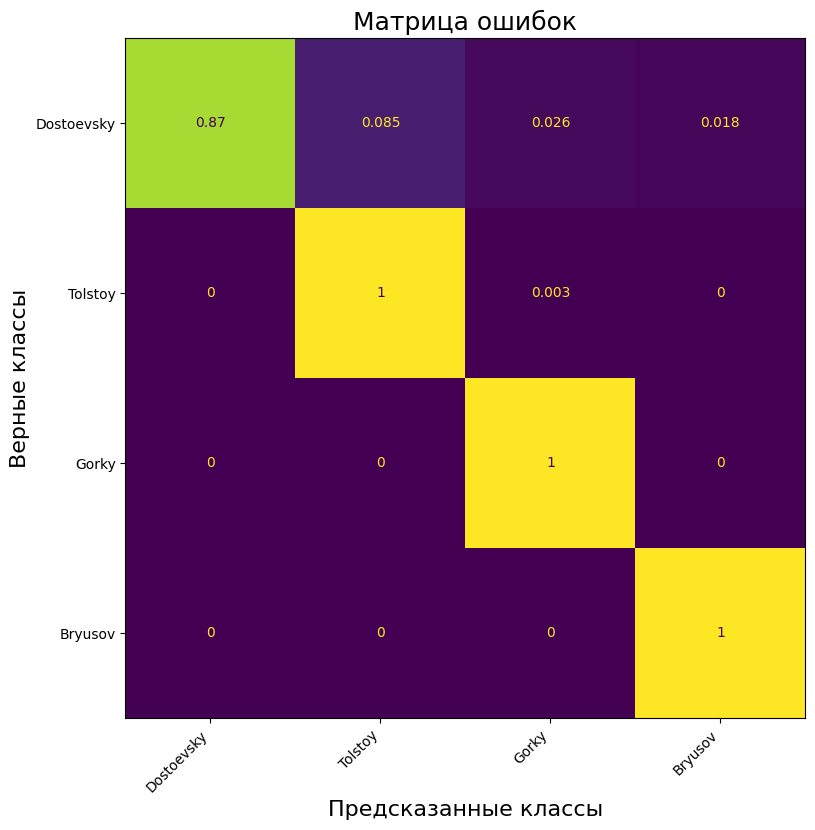


Средняя точность распознавания:  97%


In [ ]:
y_pred_mix = model_MIX.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix, CLASS_LIST)

**Матрица ошибок на контрольной выборке**

43/43 [==============================] - 4s 86ms/step


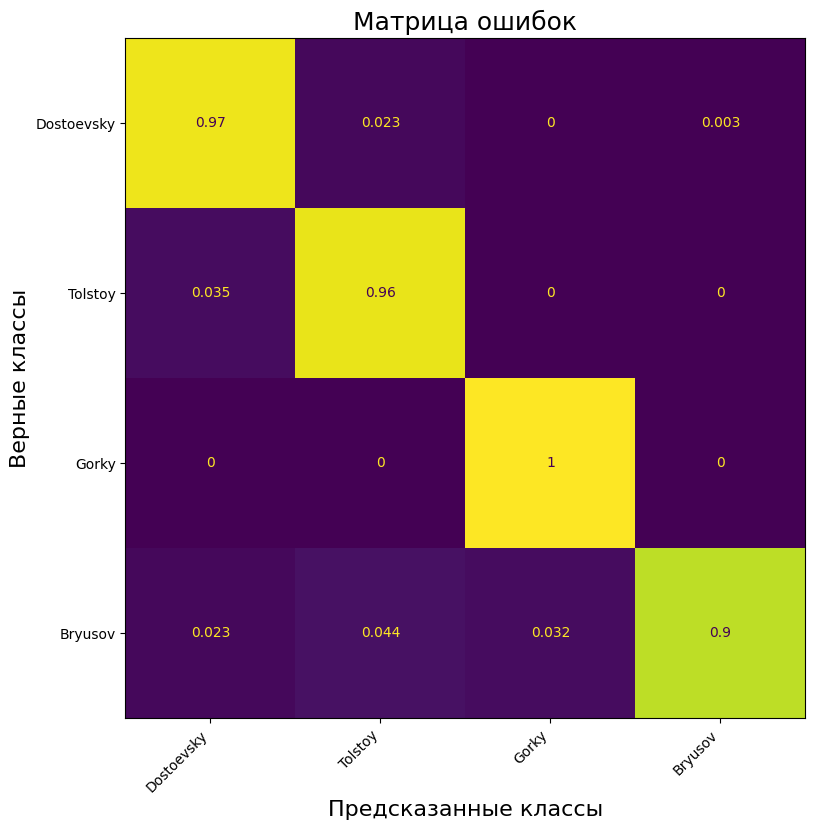


Средняя точность распознавания:  96%


In [ ]:
y_pred_mix = model_MIX.predict(x_control)
show_confusion_matrix(y_control, y_pred_mix, CLASS_LIST)

*Средняя точность распознования на контрольной выборке составляет 96% что удовлетворяет условию задачи*

**8 пункт задачи**

Анализ стихотворения Сергея Александровича Есенина - Письмо к женщине

In [ ]:
!wget https://storage.yandexcloud.net/preview/text.txt

--2024-04-23 00:56:05--  https://storage.yandexcloud.net/preview/text.txt
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3914 (3.8K) [text/plain]
Saving to: ‘text.txt’

text.txt            100%[===================>]   3.82K  --.-KB/s    in 0s      

2024-04-23 00:56:07 (1.28 GB/s) - ‘text.txt’ saved [3914/3914]



**Чтение файла**

In [ ]:
with open("text.txt") as file:
    stih = file.read()

**Формируем текст файла в dict**

In [ ]:
dict_stih = {}
dict_stih['author'] = stih.replace('\n', ' ') #Инициализация ключ словаря с текстом из файла

In [ ]:
print(dict_stih)

{'author': 'Письмо к женщине Вы помните, Вы все, конечно, помните, Как я стоял, Приблизившись к стене, Взволнованно ходили вы по комнате И что-то резкое В лицо бросали мне. Вы говорили: Нам пора расстаться, Что вас измучила Моя шальная жизнь, Что вам пора за дело приниматься, А мой удел — Катиться дальше, вниз. Любимая! Меня вы не любили. Не знали вы, что в сонмище людском Я был, как лошадь, загнанная в мыле, Пришпоренная смелым ездоком. Не знали вы, Что я в сплошном дыму, В развороченном бурей быте С того и мучаюсь, что не пойму — Куда несет нас рок событий. Лицом к лицу Лица не увидать. Большое видится на расстоянье. Когда кипит морская гладь, Корабль в плачевном состоянье. Земля — корабль! Но кто-то вдруг За новой жизнью, новой славой В прямую гущу бурь и вьюг Ее направил величаво. Ну кто ж из нас на палубе большой Не падал, не блевал и не ругался? Их мало, с опытной душой, Кто крепким в качке оставался. Тогда и я Под дикий шум, Но зрело знающий работу, Спустился в корабельный трюм,

**Преобразование текста в последовательность**

In [ ]:
embedding_dim = 300    # размерность векторов эмбединга (300d в имени эмбединга)
max_words = 15000      # Количество слов, рассматриваемых как признаки
tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', char_level=False)

tokenizer.fit_on_texts(dict_stih.values())
seq_train_stih = tokenizer.texts_to_sequences(dict_stih.values())

In [ ]:
print(dict_stih)

{'author': 'Письмо к женщине Вы помните, Вы все, конечно, помните, Как я стоял, Приблизившись к стене, Взволнованно ходили вы по комнате И что-то резкое В лицо бросали мне. Вы говорили: Нам пора расстаться, Что вас измучила Моя шальная жизнь, Что вам пора за дело приниматься, А мой удел — Катиться дальше, вниз. Любимая! Меня вы не любили. Не знали вы, что в сонмище людском Я был, как лошадь, загнанная в мыле, Пришпоренная смелым ездоком. Не знали вы, Что я в сплошном дыму, В развороченном бурей быте С того и мучаюсь, что не пойму — Куда несет нас рок событий. Лицом к лицу Лица не увидать. Большое видится на расстоянье. Когда кипит морская гладь, Корабль в плачевном состоянье. Земля — корабль! Но кто-то вдруг За новой жизнью, новой славой В прямую гущу бурь и вьюг Ее направил величаво. Ну кто ж из нас на палубе большой Не падал, не блевал и не ругался? Их мало, с опытной душой, Кто крепким в качке оставался. Тогда и я Под дикий шум, Но зрело знающий работу, Спустился в корабельный трюм,

In [ ]:
print(seq_train_stih)

[[47, 13, 48, 6, 21, 6, 49, 50, 21, 9, 1, 51, 52, 13, 53, 54, 55, 6, 22, 56, 4, 5, 23, 57, 2, 58, 59, 14, 6, 60, 61, 24, 62, 5, 7, 63, 64, 65, 66, 5, 10, 24, 11, 67, 68, 69, 70, 71, 72, 73, 74, 15, 75, 6, 3, 76, 3, 16, 6, 5, 2, 77, 78, 1, 12, 9, 79, 80, 2, 81, 82, 83, 84, 3, 16, 6, 5, 1, 2, 25, 26, 2, 27, 28, 29, 8, 30, 4, 31, 5, 3, 32, 33, 34, 17, 35, 36, 85, 13, 86, 87, 3, 88, 89, 90, 37, 91, 92, 93, 94, 95, 38, 2, 96, 97, 98, 38, 18, 19, 23, 99, 11, 39, 100, 39, 101, 2, 102, 103, 104, 4, 105, 106, 107, 108, 109, 19, 110, 111, 17, 37, 112, 113, 3, 114, 3, 115, 4, 3, 116, 117, 118, 8, 119, 120, 19, 121, 2, 122, 123, 40, 4, 1, 41, 124, 125, 18, 126, 127, 128, 129, 2, 130, 42, 43, 3, 131, 132, 133, 134, 42, 12, 135, 136, 4, 1, 137, 138, 139, 43, 3, 140, 44, 141, 142, 45, 143, 2, 144, 145, 15, 1, 46, 7, 146, 7, 147, 148, 2, 149, 150, 5, 1, 151, 152, 153, 45, 154, 2, 155, 18, 6, 3, 16, 5, 2, 25, 26, 2, 27, 28, 29, 8, 30, 4, 31, 5, 3, 32, 33, 34, 17, 35, 36, 20, 156, 157, 1, 2, 158, 159, 4

**Модернизация функции "seq_vectorize" для преобразования "seq_train_stih" в массив numpy**

In [ ]:
from itertools import repeat

In [ ]:
WIN_SIZE = 1000   # Ширина окна в токенах
WIN_STEP = 100    # Шаг окна в токенах

# Функция разбиения последовательности на отрезки скользящим окном
# Последовательность разбивается на части до последнего полного окна
# Параметры:
# sequence - последовательность токенов
# win_size - размер окна
# step - шаг окна
def seq_split(sequence, WIN_SIZE, step):
    i = int(len(sequence))
    # Делим строку на отрезки с помощью генератора цикла
    #return [sequence[i:i + WIN_SIZE] for i in range(0, len(sequence) - WIN_SIZE + 1, step)]
    return [sequence[0:i + WIN_SIZE]]

def seq_vectorize_pred(
    seq_list,   # Последовательность
    win_size,   # Ширина скользящего окна
    step        # Шаг скользящего окна
):
    gate_split_contl = int(len(seq_list[0]))

    # Списки для результирующих данных
    x_train =  []
    # Разбиваем последовательность токенов класса на отрезки
    vectors_train = seq_split(seq_list[0][:gate_split_contl], WIN_SIZE, step) # последовательность до порога попадет в обучающую выборку

    i = int(len(seq_list[0]))
    zeros = WIN_SIZE - i
    # Заполняем 0-ми до нужного формата
    x_train = [vectors_train[0] + list(repeat(0,zeros))]
    # Возвращаем результатов как numpy-массивов
    return np.array(x_train)

In [ ]:
final_text = seq_vectorize_pred(seq_train_stih, WIN_SIZE, WIN_STEP)

**Проверяем формат получаемого результата из функции векторизации**

In [ ]:
#проверяем формат входных данных
final_text.shape

(1, 1000)

In [ ]:
y_pred_mix = model_MIX.predict(final_text)

1/1 [==============================] - 0s 114ms/step


In [ ]:
y_pred_mix

array([[0.01642064, 0.7816045 , 0.0047372 , 0.19723763]], dtype=float32)

In [ ]:
for item in y_pred_mix[0]:
  print(item)

0.016420642
0.7816045
0.0047371956
0.19723763


In [ ]:
CLASS_LIST

['Dostoevsky', 'Tolstoy', 'Gorky', 'Bryusov']

**Построение круговой диаграммы результатов**

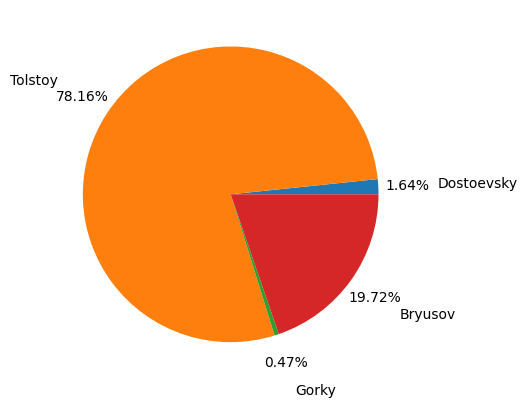

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.pie([item for item in y_pred_mix[0]], # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

**Из визуализации круговой диаграммы результатов можно сделать вывод, что стихотворение Есенина в большей степени похоже на произведения Толстого**